Some sounds are distinct and instantly recognizable, like a baby’s laugh or the strum of a guitar.

Other sounds aren’t clear and are difficult to pinpoint. If you close your eyes, can you tell which of the sounds below is a chainsaw versus a blender?

Moreover, we often experience a mix of sounds that create an ambience – like the clamoring of construction, a hum of traffic from outside the door, blended with loud laughter from the room, and the ticking of the clock on your wall. The sound clip below is of a busy food court in the UK.

Partly because of the vastness of sounds we experience, no reliable automatic general-purpose audio tagging systems exist. Currently, a lot of manual effort is required for tasks like annotating sound collections and providing captions for non-speech events in audiovisual content.

To tackle this problem, Freesound (an initiative by MTG-UPF that maintains a collaborative database with over 370,000 Creative Commons Licensed sounds) and Google Research’s Machine Perception Team (creators of AudioSet, a large-scale dataset of manually annotated audio events with over 500 classes) have teamed up to develop the dataset for this competition.

You’re challenged to build a general-purpose automatic audio tagging system using a dataset of audio files covering a wide range of real-world environments. Sounds in the dataset include things like musical instruments, human sounds, domestic sounds, and animals from Freesound’s library, annotated using a vocabulary of more than 40 labels from Google’s AudioSet ontology. To succeed in this competition your systems will need to be able to recognize an increased number of sound events of very diverse nature, and to leverage subsets of training data featuring annotations of varying reliability (see Data section for more information).

Import necessary packages

In [6]:
import numpy as np
np.random.seed(1001)

import os
import shutil

import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.model_selection import StratifiedKFold

In [7]:
# Set source code directory to import modules

import sys  
sys.path.insert(0, '../src')

Load train data

In [8]:
train = pd.read_csv('../data/train.csv')

Show some data

In [9]:
from information import Information
info = Information(train)
info.show_basic_info(train)


Information object is created

====> This data contains 9473 rows and 3 columns

FEATURE NAME  DATA FORMAT   SEVEN SAMPLES  
fname           object        4fd997f5.wav,080bffb7.wav,06d0d6e4.wav,a6c865fd.wav,2392ad36.wav,116ddaf8.wav,180cd1d7.wav,
label           object        Cough,Applause,Writing,Squeak,Bass_drum,Keys_jangling,Meow,
manually_verified int64         0,1,1,0,0,1,1,
          fname               label  manually_verified
0  00044347.wav              Hi-hat                  0
1  001ca53d.wav           Saxophone                  1
2  002d256b.wav             Trumpet                  0
3  0033e230.wav        Glockenspiel                  1
4  00353774.wav               Cello                  1
5  003b91e8.wav               Cello                  0
6  003da8e5.wav               Knock                  1
7  0048fd00.wav  Gunshot_or_gunfire                  1
8  004ad66f.wav            Clarinet                  0
9  0063ab88.wav   Computer_keyboard                  0


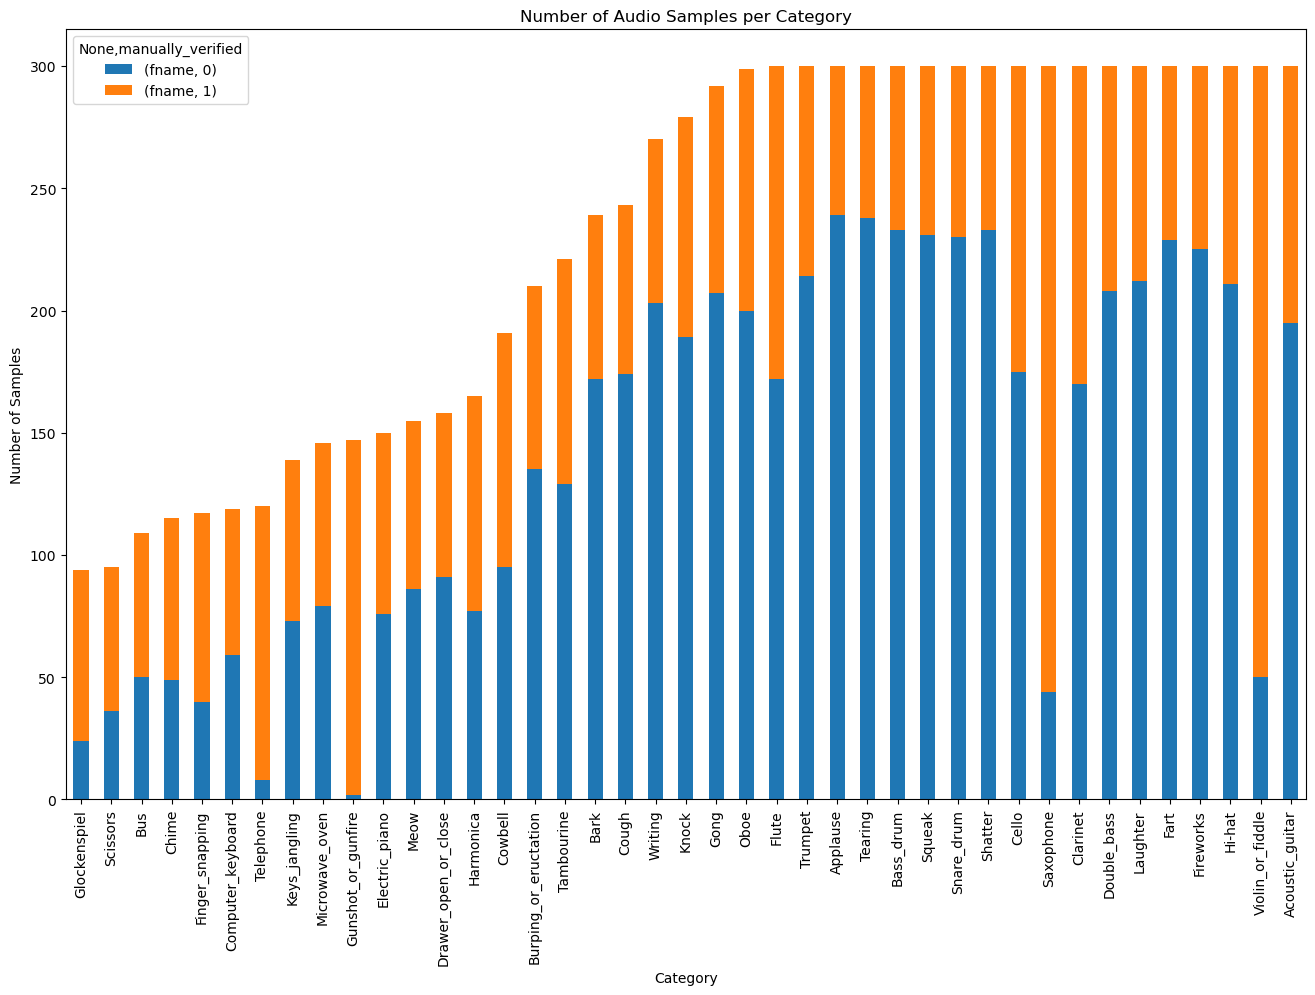

In [10]:
info.show_manual_info()